# Iris Data set

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Read the data from CSV using pandas

In [31]:
iris=pd.read_csv("C:/Users/sa10320/Dumps/Springboard/Adhoc Projects/Iris dataset/iris.csv")

### 2.Check the shape of the data

In [32]:
iris.shape

(150, 5)

### 3.Data Description- Statistical Summary

In [33]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 4.Peek at the data

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 5.Class Distribution- Each class of species has 50 record counts in dataset

In [35]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


### 6.Data Visualization

#### We will look at two types of plot-

1.Univariate plots to better understand each attribute.

2.Multivariate plots to better understand the relationships between attributes.

### Univariate Plots

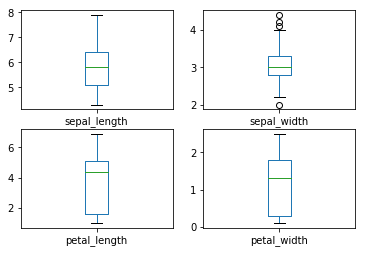

In [53]:
iris.plot(kind='box',subplots='True',layout=(2,2),sharex=False,sharey=False)
plt.show()

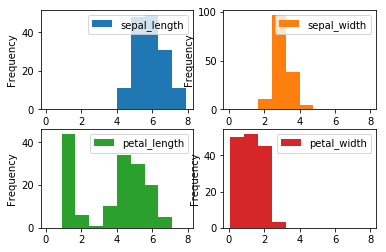

In [73]:
iris.plot(kind='hist',subplots='True',layout=(2,2),sharex=False,sharey=False)
plt.show()

### Multivariate Visualization-Looking at the interactions between the variables.

In [78]:
import pandas
from pandas.plotting import scatter_matrix


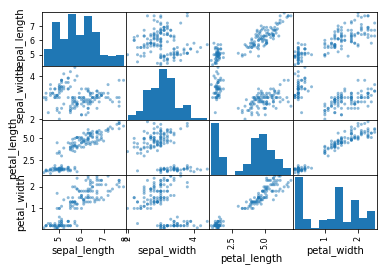

In [79]:
scatter_matrix(iris)
plt.show()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable rel
ationship.

## Create a Validation Dataset(Train and Test Split 80:20)

In [130]:
array=iris.values
X = array[:,0:4]
Y = array[:,4]
seed=7
from sklearn import model_selection
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.2,random_state=seed)

In [118]:
len(X_train)

120

In [119]:
len(X_test)

30

In [120]:
len(Y_train)

120

In [121]:
len(Y_test)

30

# Building various ML Models

Below models chosen is a good mixture of simple linear and nonlinear algorithms. 
We reset the random number seed before each run to ensure that the evaluation of each algorithm 
is performed using exactly the same data splits. It ensures the results are directly comparable

In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [116]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Below are the accuracy of each model-

In [134]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    kfold = model_selection.KFold(n_splits=10)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean(),"(",results[i].std(),")")

LR 0.966666666667 ( 0.0408248290464 )
LDA 0.975 ( 0.0381881307913 )
KNN 0.983333333333 ( 0.0333333333333 )
CART 0.975 ( 0.0381881307913 )
RF 0.958333333333 ( 0.0416666666667 )
NB 0.975 ( 0.0533593686453 )
SVM 0.991666666667 ( 0.025 )


We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

The box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

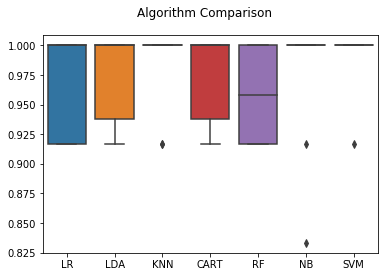

In [140]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

# Making Prediction

The SVC algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.



This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.



We can run the svc model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [164]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [161]:
# Make predictions on validation dataset
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
print("Accuracy Score-",accuracy_score(Y_test, predictions)* 100,"% \n")

print("Confusion Matrix- \n \n", confusion_matrix(Y_test, predictions),"\n")

print("Classification Report- \n" ,classification_report(Y_test, predictions))

Accuracy Score- 93.3333333333 % 

Confusion Matrix- 
 
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]] 

Classification Report- 
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       1.00      0.83      0.91        12
  virginica       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30

